# Data Preprocessing

## Content

<ol>
<li> Import Module </li>
<li> Dataset </li>
<li> Data Analysis </li>
<li> Feature Correlation </li>
<li> Data Cleaning
    <ul>
        <li>Duplicated Records</li>
        <li>Low Variance Variables</li>
        <li>Missing Values</li>
        <li>Outliers</li>
    </ul>
</li>
<li> Feature Encoding </li>
<li> Feature Scaling </li>
</ol>

## 1. Import module
<hr/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder

ModuleNotFoundError: No module named 'category_encoders'

## 2. Dataset
<hr/>

In [ ]:
data = {
    'Age': [31.0, 23.0, 28.0, 28.0, 27.0, 26.0, 26.0, 30.0, 24.0, 26.0, 200], 
    'Sex': ['M', 'M', 'M', 'F', 'M', None, 'F', 'F', 'M', 'F', 'M'],
    'Salary': [1000, 2500, 1200, 3000, 500, 250, None, 2400, 1500, 2500, 3000],
    'Num_Children': [2, 0, 0, 3, 2, 1, 4, 3, 0, 2, 2],
    'Num_Pet': [5, 1, 0, 5, 2, 2, 3, 2, 1, 0, 1],
    'Education': ['Bachelor', 'Phd', 'Master', None, 'Master', 'Bachelor', None, 'Master', 'Phd', 'Phd', 'Master'],
    'Country': ['US', 'France', 'England', 'Spain', 'Italy', 'France', 'France', 'US', 'France', 'Italy', 'US'],
    'Marital_Status': ['Single', None, 'Single', None, 'Single', 'Single', None, 'Single', None, None, 'Single']
}
df = pd.DataFrame(data)

df = df.fillna(np.nan)
df.head(9)

## 3. Data Analysis
<hr/>

In [ ]:
# show summary information
df.info()

In [ ]:
# show statistics information
df.describe()

In [ ]:
# show statistics information for categorical columns
df.select_dtypes(include=['object']).describe()

In [ ]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
# plot histgrame for 'Age'
df['Age'].plot.hist()
# df['Age'].plot.hist(bins=(range(0,250,10)))

In [ ]:
# plot boxplot for 'Age'
df['Age'].plot.box(vert=False)

In [ ]:
# plot bar chart for 'Sex'
df['Sex'].value_counts().plot.bar()

In [ ]:
# plot pie chart for 'Sex'
df['Sex'].value_counts().plot.pie(autopct='%.2f%%', figsize=(9, 7))

In [ ]:
# plot bar chart for 'Num_Pet'
df['Num_Pet'].plot.bar()

In [ ]:
# plot bar chart for 'Num_Children'
df['Num_Children'].plot.bar()

In [ ]:
# plot bar chart for 'Education'
df['Education'].value_counts().plot.bar()

In [ ]:
# plot histogram for 'Salary'
df['Salary'].plot.hist()

In [ ]:
# plot boxplot for 'Salary'
df['Salary'].plot.box(vert=False)

## 4. Feature Correlation
<hr/>

In [ ]:
df.head()

In [ ]:
# compute correlation coefficent between fields while ignoring the categorical columns
pearson_corr = df.corr(method='pearson', numeric_only=True)

pearson_corr

In [ ]:
# plot correlation coefficent using heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)

## 5. Data Cleaning
<hr/>

### Duplicated Records

In [ ]:
# select duplicated rows
df[df.duplicated()]

In [ ]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

df

### Low Variance Variables

In [ ]:
# remove categorical column having only one value
cat_threshold = 1
df.drop([col for col in df.columns.values 
               if not is_numeric_dtype(df[col]) and df[col].nunique() == cat_threshold],
              axis=1, inplace=True)

df

### Missing Values (NaN)

In [ ]:
# count missing values for each column
df.isnull().sum()

In [ ]:
# visualize missing values for each column
df.isnull().sum().plot.bar()

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values
missing_cols = missing_percentage[missing_percentage > 0]

# Plot a pie chart with percentages for columns with missing values
plt.figure(figsize=(8, 8))
plt.pie(missing_cols, labels=missing_cols.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values by Column')
plt.show()

#### **First Option**: Remove NaN Records(Rows)

In [2]:
# drop rows containing NaN values
df.dropna()
# set inplace=True to apply to df

NameError: name 'df' is not defined

#### **Second Option**: Remove NaN features/columns ⚠️ **Not Recommended**

In [3]:
df.dropna(axis=1)
# set inplace=True to apply to df

NameError: name 'df' is not defined

#### **Third Option**: Apply Imputation

##### Fillna

In [4]:
for col in df.columns.values:
    # numerial column
    if is_numeric_dtype(df[col]):
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        # categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)    
df

NameError: name 'df' is not defined

##### Imputation

In [5]:
df_copy = df.copy()

NameError: name 'df' is not defined

In [6]:
numerical = df.select_dtypes(include=['number']) 
categorical = df.select_dtypes(include=['object'])

NameError: name 'df' is not defined

In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with median
numeric_imputer = SimpleImputer(strategy="median")
df_copy[numerical.columns] = numeric_imputer.fit_transform(numerical)

# Impute missing values in categorical columns with most frequent category
categorical_imputer = SimpleImputer(strategy="most_frequent")
df_copy[categorical.columns] = categorical_imputer.fit_transform(categorical)

# Check the DataFrame after imputation
print(df_copy)

NameError: name 'numerical' is not defined

In [ ]:
df = df_copy
df

### Outliers

In [8]:
df['Age'].plot.box(vert=False)

NameError: name 'df' is not defined

In [554]:
# remove outliers by interquartile range (IQR)
def remove_outliers_with_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    return df[~outlier]

# remove outliers by z-score - mostly used with normal distribution
def remove_outliers_with_zscore(df):
    cols = df.select_dtypes(include=np.number).columns.tolist()
    std = df[cols].std()
    mean = df[cols].mean()
    zscore = abs((df[cols] - mean) / std)

    outlier = (zscore > 3).any(axis=1)

    return df[~outlier].copy()

df = remove_outliers_with_zscore(df)

<Axes: >

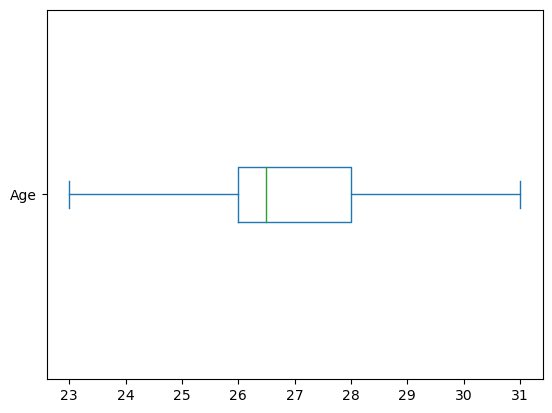

In [555]:
df['Age'].plot.box(vert=False)

## 6. Feature Encoding
<hr/>

In [561]:
# count unique values of categorical columns
categorical = df.select_dtypes(include=['object'])
for col in categorical:
    print(f"{df[col].unique()}")

['M' 'F']
['Bachelor' 'Phd' 'Master']
['US' 'France' 'England' 'Spain' 'Italy']


### Sklearn

#### One Hot Encoder

In [605]:
from sklearn.preprocessing import OneHotEncoder

categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(include=['number'])

categorical_1h = OneHotEncoder(drop="first")
df_ = categorical_1h.fit_transform(categorical)

In [606]:
df_.toarray()

array([[1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1.]])

In [607]:
df_1h = pd.DataFrame(df_.toarray(), columns=categorical_1h.get_feature_names_out(),index=categorical.index)
df_1h

,Sex_M,Education_Master,Education_Phd,Country_France,Country_Italy,Country_Spain,Country_US
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [608]:
# You should wait until the numerical value has been scaled before combining them back
df_ = pd.concat([df_1h, numerical], axis=1)
df_

,Sex_M,Education_Master,Education_Phd,Country_France,Country_Italy,Country_Spain,Country_US,Age,Salary,Num_Children,Num_Pet
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,1000.0,2.0,5.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,23.0,2500.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,1200.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,3000.0,3.0,5.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,27.0,500.0,2.0,2.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,250.0,1.0,2.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,26.0,1950.0,4.0,3.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,2400.0,3.0,2.0
8,1.0,0.0,1.0,1.0,0.0,0.0,0.0,24.0,1500.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,26.0,2500.0,2.0,0.0


#### Ordinal Encoder

In [612]:
from sklearn.preprocessing import OrdinalEncoder
categorical_oe = OrdinalEncoder()
df_ = categorical_oe.fit_transform(categorical)
df_

array([[1., 0., 4.],
       [1., 2., 1.],
       [1., 1., 0.],
       [0., 1., 3.],
       [1., 1., 2.],
       [1., 0., 1.],
       [0., 1., 1.],
       [0., 1., 4.],
       [1., 2., 1.],
       [0., 2., 2.],
       [1., 1., 4.]])

In [616]:
categorical_oe.categories_

[array(['F', 'M'], dtype=object),
 array(['Bachelor', 'Master', 'Phd'], dtype=object),
 array(['England', 'France', 'Italy', 'Spain', 'US'], dtype=object)]

In [613]:
df_oe = pd.DataFrame(df_, columns=categorical_oe.get_feature_names_out(),index=categorical.index)
df_oe

,Sex,Education,Country
0,1.0,0.0,4.0
1,1.0,2.0,1.0
2,1.0,1.0,0.0
3,0.0,1.0,3.0
4,1.0,1.0,2.0
5,1.0,0.0,1.0
6,0.0,1.0,1.0
7,0.0,1.0,4.0
8,1.0,2.0,1.0
9,0.0,2.0,2.0


In [617]:
# You should wait until the numerical value has been scaled before combining them back
df_ = pd.concat([df_oe, numerical], axis=1)
df_

,Sex,Education,Country,Age,Salary,Num_Children,Num_Pet
0,1.0,0.0,4.0,31.0,1000.0,2.0,5.0
1,1.0,2.0,1.0,23.0,2500.0,0.0,1.0
2,1.0,1.0,0.0,28.0,1200.0,0.0,0.0
3,0.0,1.0,3.0,28.0,3000.0,3.0,5.0
4,1.0,1.0,2.0,27.0,500.0,2.0,2.0
5,1.0,0.0,1.0,26.0,250.0,1.0,2.0
6,0.0,1.0,1.0,26.0,1950.0,4.0,3.0
7,0.0,1.0,4.0,30.0,2400.0,3.0,2.0
8,1.0,2.0,1.0,24.0,1500.0,0.0,1.0
9,0.0,2.0,2.0,26.0,2500.0,2.0,0.0


### Categorical Encoder Library

#### Ordinal Encoder

In [225]:
ordinal_encoder = ce.OrdinalEncoder(cols=['Sex', 'Education', 'Country'], 
                                    mapping=[
                                        {'col': 'Sex', 'mapping': {'M': 0, 'F': 1}},
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}},
                                        {'col': 'Country', 'mapping': {'US': 0, 'France': 1, 'England': 2, 'Spain':3, 'Italy':4 }}
                                    ])
df_ = ordinal_encoder.fit_transform(df)

In [226]:
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country
0,31.0,0,1000.0,2,5,0,0
1,23.0,0,2500.0,0,1,2,1
2,28.0,0,1200.0,0,0,1,2
3,28.0,1,3000.0,3,5,1,3
4,27.0,0,500.0,2,2,1,4
5,26.0,0,250.0,1,2,0,1
6,26.0,1,1785.0,4,3,1,1
7,30.0,1,2400.0,3,2,1,0
8,24.0,0,1500.0,0,1,2,1
9,26.0,1,2500.0,2,0,2,4


#### OneHot Encoder

In [570]:
onehot_encoder = ce.OneHotEncoder(categorical)
df_ = onehot_encoder.fit_transform(df)
# select the categorical columns and drop one element of each one hot encoded column
column_to_drop = [col+"_1" for col in categorical.columns]

# set inplace=True for the dataframe to take effect
df_.drop(column_to_drop,axis=1)

,Age,Sex_2,Salary,Num_Children,Num_Pet,Education_2,Education_3,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,1,0,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,0,1,0,0,0
6,26.0,1,1950.0,4.0,3.0,0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,1,0,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,1,0,0,0,0,1


#### Label Encode + One Hot Encode

In [618]:
ordinal_encoder = ce.OrdinalEncoder(cols=['Sex', 'Education'], 
                                    mapping=[
                                        {'col': 'Sex', 'mapping': {'M': 0, 'F': 1}},
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}}
                                    ])
df_ = ordinal_encoder.fit_transform(df)

onehot_encoder = ce.OneHotEncoder(cols=['Country'])
df_ = onehot_encoder.fit_transform(df_)
df_.drop('Country_1', axis=1, inplace=True)
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,2,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,1,0,0,0
6,26.0,1,1950.0,4.0,3.0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,2,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,2,0,0,0,1


### ⚠️ Pandas - Not recommended

In [16]:
df = pd.get_dummies(df, drop_first=True, columns=['Sex', 'Country'])

# for ordinal encoding use scikit-learn since pandas have no this feature
ordinal_encoder = ce.OrdinalEncoder(cols=['Education'], 
                                    mapping=[
                                        {'col': 'Education', 'mapping': {'Bachelor': 0, 'Master': 1, 'Phd': 2}}
                                    ])

df = ordinal_encoder.fit_transform(df)

df

,Age,Salary,Num_Children,Num_Pet,Education,Sex_M,Country_France,Country_Italy,Country_Spain,Country_US
0,31.0,1000.0,2,5,0,1,0,0,0,1
1,23.0,2500.0,0,1,2,1,1,0,0,0
2,28.0,1200.0,0,0,1,1,0,0,0,0
3,28.0,3000.0,3,5,1,0,0,0,1,0
4,27.0,500.0,2,2,1,1,0,1,0,0
5,26.0,250.0,1,2,0,1,1,0,0,0
6,26.0,1785.0,4,3,1,0,1,0,0,0
7,30.0,2400.0,3,2,1,0,0,0,0,1
8,24.0,1500.0,0,1,2,1,1,0,0,0
9,26.0,2500.0,2,0,2,0,0,1,0,0


## 7. Feature Scaling
<hr/>

Suppose that we applied the label encoder to the "Sex" and "Educatioin" columns, and one hot encoder to the "Country" column.

In [619]:
df_

,Age,Sex,Salary,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,1000.0,2.0,5.0,0,0,0,0,0
1,23.0,0,2500.0,0.0,1.0,2,1,0,0,0
2,28.0,0,1200.0,0.0,0.0,1,0,1,0,0
3,28.0,1,3000.0,3.0,5.0,1,0,0,1,0
4,27.0,0,500.0,2.0,2.0,1,0,0,0,1
5,26.0,0,250.0,1.0,2.0,0,1,0,0,0
6,26.0,1,1950.0,4.0,3.0,1,1,0,0,0
7,30.0,1,2400.0,3.0,2.0,1,0,0,0,0
8,24.0,0,1500.0,0.0,1.0,2,1,0,0,0
9,26.0,1,2500.0,2.0,0.0,2,0,0,0,1


**⚠️ You shoudn't scale the target or label value, because we don't want the machine to learn to predict a scale value.**

In [623]:
df_label = df_['Salary']
df_label

0     1000.0
1     2500.0
2     1200.0
3     3000.0
4      500.0
5      250.0
6     1950.0
7     2400.0
8     1500.0
9     2500.0
10    3000.0
Name: Salary, dtype: float64

In [624]:
df_input = df_.drop(['Salary'],axis=1)
df_input

,Age,Sex,Num_Children,Num_Pet,Education,Country_2,Country_3,Country_4,Country_5
0,31.0,0,2.0,5.0,0,0,0,0,0
1,23.0,0,0.0,1.0,2,1,0,0,0
2,28.0,0,0.0,0.0,1,0,1,0,0
3,28.0,1,3.0,5.0,1,0,0,1,0
4,27.0,0,2.0,2.0,1,0,0,0,1
5,26.0,0,1.0,2.0,0,1,0,0,0
6,26.0,1,4.0,3.0,1,1,0,0,0
7,30.0,1,3.0,2.0,1,0,0,0,0
8,24.0,0,0.0,1.0,2,1,0,0,0
9,26.0,1,2.0,0.0,2,0,0,0,1


### Standardization

In [630]:
std_scaler = StandardScaler()
# Category to ignore
categorical = ['Country_2','Country_3', 'Country_4','Country_5', 'Education','Sex']
# Dataframe of the categorical data
df_cat = df_input[categorical]

# Scaling on the numerical data
scaled_data = std_scaler.fit_transform(df_input.drop(columns=categorical))

# Create column header for Dataframe
columns_header = ['Age','Num_Children','Num_Pet']
# Convert it back to Pandas Dataframe
scaled_data = pd.DataFrame(data=scaled_data, columns=columns_header, index=df_.index)

# Combine the scaled data with the categorical data
df_input_std = pd.concat([scaled_data, df_cat], axis=1)
df_input_std

,Age,Num_Children,Num_Pet,Country_2,Country_3,Country_4,Country_5,Education,Sex
0,-0.233602,0.212132,1.81659,0,0,0,0,0,0
1,-0.394203,-1.343503,-0.60553,1,0,0,0,2,0
2,-0.293827,-1.343503,-1.21106,0,1,0,0,1,0
3,-0.293827,0.989949,1.81659,0,0,1,0,1,1
4,-0.313902,0.212132,0.00000,0,0,0,1,1,0
5,-0.333977,-0.565685,0.00000,1,0,0,0,0,0
6,-0.333977,1.767767,0.60553,1,0,0,0,1,1
7,-0.253677,0.989949,0.00000,0,0,0,0,1,1
8,-0.374127,-1.343503,-0.60553,1,0,0,0,2,0
9,-0.333977,0.212132,-1.21106,0,0,0,1,2,1


### Min-max normalization

In [632]:
min_max_scaler = MinMaxScaler()
# Category to ignore
categorical = ['Country_2','Country_3', 'Country_4','Country_5', 'Education','Sex']
# Dataframe of the categorical data
df_cat = df_input[categorical]

# Scaling on the numerical data
scaled_data = min_max_scaler.fit_transform(df_input.drop(columns=categorical))
scaled_data 

# Create column header for Dataframe
columns_header = ['Age','Num_Children','Num_Pet']

# Convert it back to Pandas Dataframe
scaled_data = pd.DataFrame(data=scaled_data, columns=columns_header, index=df_.index)

# Combine the scaled data with the categorical data
df_input_minmax = pd.concat([scaled_data, df_cat], axis=1)
df_input_minmax

,Age,Num_Children,Num_Pet,Country_2,Country_3,Country_4,Country_5,Education,Sex
0,0.045198,0.50,1.0,0,0,0,0,0,0
1,0.000000,0.00,0.2,1,0,0,0,2,0
2,0.028249,0.00,0.0,0,1,0,0,1,0
3,0.028249,0.75,1.0,0,0,1,0,1,1
4,0.022599,0.50,0.4,0,0,0,1,1,0
5,0.016949,0.25,0.4,1,0,0,0,0,0
6,0.016949,1.00,0.6,1,0,0,0,1,1
7,0.039548,0.75,0.4,0,0,0,0,1,1
8,0.005650,0.00,0.2,1,0,0,0,2,0
9,0.016949,0.50,0.0,0,0,0,1,2,1
